In [1]:
%matplotlib ipympl

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Import own code
from algorithms import *
from signal_data_class import SignalData
from plot_data import plot_inv_frac, plot_all_3d, plot_misfires, plot_roc_curve, plot_roc_curves
from interactive_trigger_class import InteractiveTrigger

sb.set()

SN1 = "../data/SN1_Chirp_300kHzTemplate_0p16SNR_280Start_Sig.npy"  # Nasty noise
SN2 = "../data/SN2_Chirp_300kHzTemplate_0p32SNR_280Start_Sig.npy"  # Nice noise
SX1 = "../data/SX1_ChirpSig_ChirpTemplate_325p5kHz_3p45e8Grad_1024pt_99mV.npy"
SX2 = "../data/SX2_ChirpSig_ChirpTemplate_325p5kHz_3p45e8Grad_1024pt_132mV.npy"
SX3 = "../data/SX3_ChirpSig_ChirpTemplate_325p5kHz_3p45e8Grad_1024pt_264mV.npy"
XN1 = "../data/XN1_Chirp_300kHzTemplate_0p16SNR_280Start_Noise.npy"  # Nasty noise
XN2 = "../data/XN2_Chirp_300kHzTemplate_0p32SNR_280Start_Noise.npy"  # Nice noise


In [2]:
data = {}
# data["SN1"] = np.array(list( zip(*np.load(SN1)) ))
# data["SN2"] = np.array(list( zip(*np.load(SN2)) ))
data["SX1"] = np.array(list( zip(*np.load(SX1)) ))
# data["SX2"] = np.array(list( zip(*np.load(SX2)) ))
# data["SX3"] = np.array(list( zip(*np.load(SX3)) ))
# data["XN1"] = np.array(list( zip(*np.load(XN1)) ))
data["XN2"] = np.array(list( zip(*np.load(XN2)) ))

# df = pd.read_csv("../data/SX1+XN1.csv")
# data["SX1+XN1"] = [df.t, df.signal]
df = pd.read_csv("../data/SX1+XN2.csv")
data["SX1+XN2"] = [df.t, df.signal]

SX1_truth_data_df = pd.read_csv("../data/SX1_truth_data.csv")
# SX1_truth_data = list(SX1_truth_data_df.truth_data)
SX1_truth_data = SX1_truth_data_df.truth_data


In [3]:
# Get equal number of signal and noise sections to test
foo = 1_000_000

# Data for pure noise
time_p1 = np.array( data["SX1"][0] )[:foo]
time_p2 = np.array( data["SX1"][0] )[-1] + np.array( data["XN2"][0][:foo] )  # Need to shift vals
time = np.concatenate(( time_p1, time_p2 ))
signal = np.concatenate(( data["SX1"][1][:foo], data["XN2"][1][:foo] ))
truth_data = np.concatenate(( SX1_truth_data[:foo], np.zeros(foo) ))

sigdat_pure = SignalData(time, signal, truth_data=truth_data)
sigdat_pure_image = InteractiveTrigger(
        time,
        signal,
        truth_data = truth_data,
        # filter_alg = sma_convolve_extracted,
        # title = "SX1 (pure) with SX1 truth data, then pure noise XN2, SMA filter",
        title = "SX1 (pure) with SX1 truth data, then pure noise XN2, LP IIR filter",
        tolerance = 300e-6,
        slice_start = 900_000,
        slice_end = 1_100_000,
    )

# Data for artificial signal + noise
time_p1 = np.array( data["SX1+XN2"][0] )[:foo]
time_p2 = np.array( data["SX1+XN2"][0] )[-1] + np.array( data["XN2"][0][:foo] )  # Need to shift vals
time = np.concatenate(( time_p1, time_p2 ))
signal = np.concatenate(( data["SX1+XN2"][1][:foo], data["XN2"][1][:foo] ))
truth_data = np.concatenate(( SX1_truth_data[:foo], np.zeros(foo) ))

sigdat_combo = SignalData(time, signal, truth_data=truth_data)
sigdat_combo_image = InteractiveTrigger(
        time,
        signal,
        truth_data = truth_data,
        # filter_alg = sma_convolve_extracted,
        # title = "SX1+XN2 with SX1 truth data, then pure noise XN2, SMA filter",
        title = "SX1+XN2 with SX1 truth data, then pure noise XN2, LP IIR filter",
        tolerance = 300e-6,
        slice_start = 900_000,
        slice_end = 1_100_000,
    )

# Default values
inv_frac_vals = np.arange(0, 8, 0.5)
delay_samples_vals = np.arange(0, 150 + 25, 25)


Label(value='Hitrate: 0.32')

Label(value='Misfire rate: 0.8527131782945736')

interactive(children=(IntSlider(value=900, description='Decay part / 1024', layout=Layout(width='50%'), max=10…

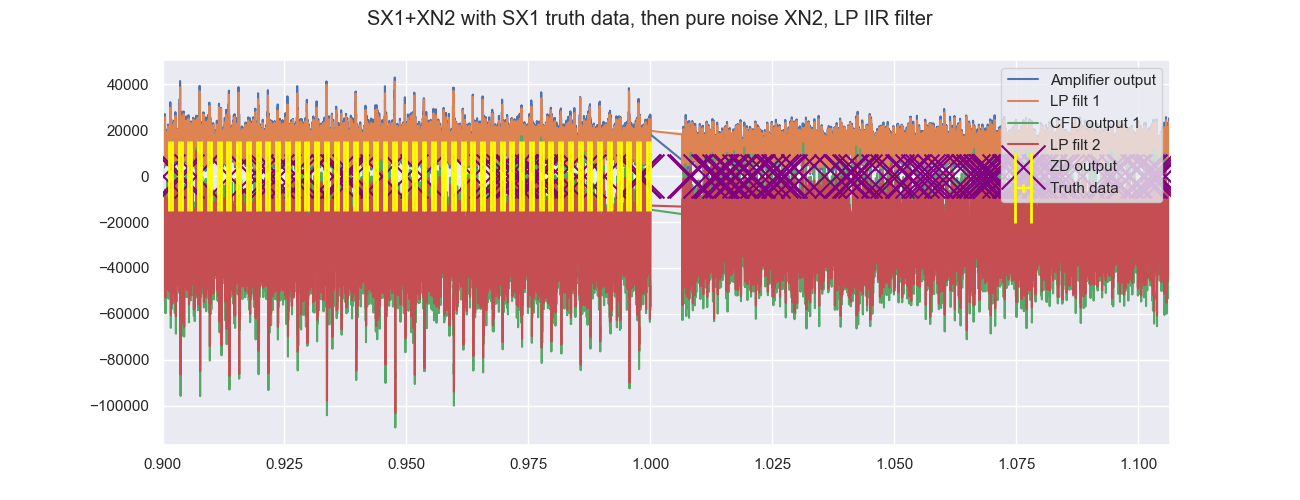

In [4]:
sigdat_combo_image.show()


Label(value='Hitrate: 1.0')

Label(value='Misfire rate: 0.6047904191616766')

interactive(children=(IntSlider(value=900, description='Decay part / 1024', layout=Layout(width='50%'), max=10…

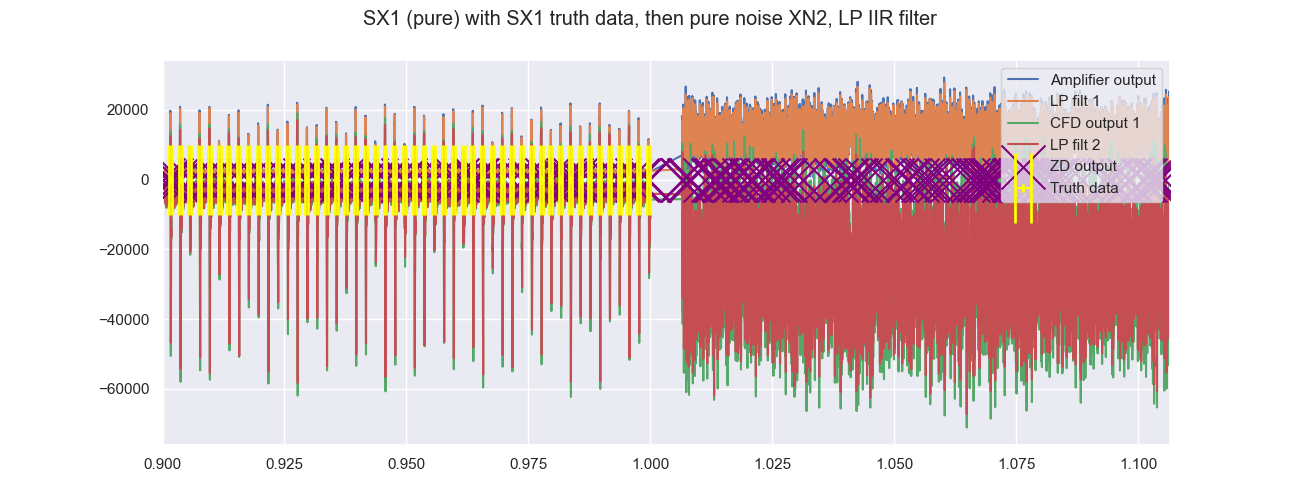

In [5]:
sigdat_pure_image.show()


In [6]:
# inv_frac_vals2 = np.arange(1, 7, 1)
# delay_samples_vals2 = np.arange(50, 250, 50)

# u1_roc_data = sigdat_combo.get_roc_curve_data(inv_frac_vals = inv_frac_vals2,
#                                         delay_samples_vals = delay_samples_vals2,
#                                         verbose = True,
#                                         tolerance = 2,
#                                        )

# u1_pd = pd.DataFrame(u1_roc_data)  # Faster to pass list of dicts than to add rows iteratively

# plot_roc_curve(u1_pd, title="Combo: Test")
# print()


In [7]:
# inv_frac_vals2 = np.arange(1, 7, 1)
# delay_samples_vals2 = np.arange(50, 250, 50)

# v1_roc_data = sigdat_pure.get_roc_curve_data(inv_frac_vals = inv_frac_vals2,
#                                         delay_samples_vals = delay_samples_vals2,
#                                         verbose = True,
#                                         tolerance = 2,
#                                        )

# v1_pd = pd.DataFrame(v1_roc_data)  # Faster to pass list of dicts than to add rows iteratively

# plot_roc_curve(v1_pd, title="Pure: Test")
# print()


In [8]:
# u2_roc_data = sigdat_combo.get_roc_curve_data(inv_frac_vals = inv_frac_vals,
#                                         delay_samples_vals = delay_samples_vals,
#                                         verbose = True,
#                                        )

# u2_pd = pd.DataFrame(u2_roc_data)  # Faster to pass list of dicts than to add rows iteratively
# u2_pd.to_csv("u2_roc_data.csv.temp")


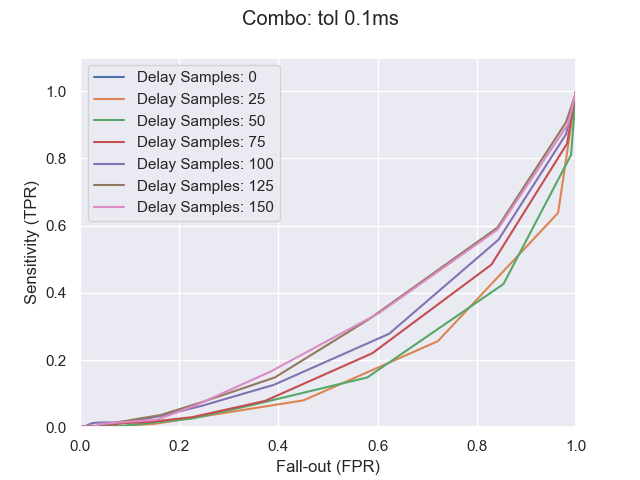

In [9]:
u2_pd_analyse = pd.read_csv("u2_roc_data.csv.temp")
plot_roc_curve(u2_pd_analyse, title="Combo: tol 0.1ms")
print()


In [10]:
# v2_roc_data = sigdat_pure.get_roc_curve_data(inv_frac_vals = inv_frac_vals,
#                                         delay_samples_vals = delay_samples_vals,
#                                         verbose = True,
#                                        )

# v2_pd = pd.DataFrame(v2_roc_data)  # Faster to pass list of dicts than to add rows iteratively
# v2_pd.to_csv("v2_roc_data.csv.temp")


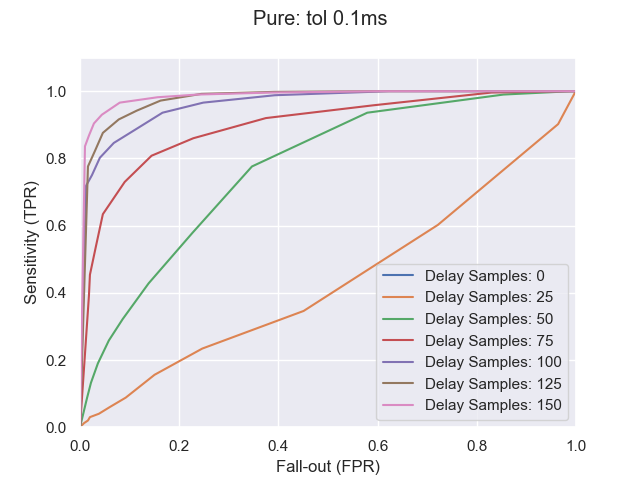

In [11]:
v2_pd_analyse = pd.read_csv("v2_roc_data.csv.temp")
plot_roc_curve(v2_pd_analyse, title="Pure: tol 0.1ms")
print()


In [12]:
# u3_roc_data = sigdat_combo.get_roc_curve_data(inv_frac_vals = inv_frac_vals,
#                                         delay_samples_vals = delay_samples_vals,
#                                         tolerance = 300e-6,
#                                         verbose = True,
#                                        )

# u3_pd = pd.DataFrame(u3_roc_data)  # Faster to pass list of dicts than to add rows iteratively
# u3_pd.to_csv("u3_roc_data.csv.temp")


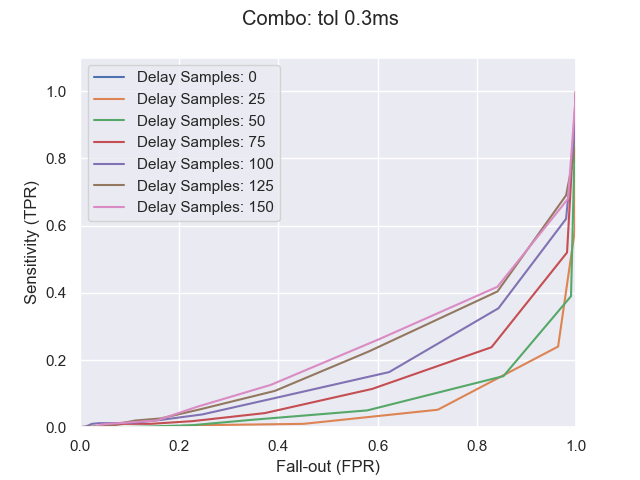

In [13]:
u3_pd_analyse = pd.read_csv("u3_roc_data.csv.temp")
plot_roc_curve(u3_pd_analyse, title="Combo: tol 0.3ms")
print()


In [14]:
# v3_roc_data = sigdat_pure.get_roc_curve_data(inv_frac_vals = inv_frac_vals,
#                                         delay_samples_vals = delay_samples_vals,
#                                         tolerance = 300e-6,
#                                         verbose = True,
#                                        )

# v3_pd = pd.DataFrame(v3_roc_data)  # Faster to pass list of dicts than to add rows iteratively
# v3_pd.to_csv("v3_roc_data.csv.temp")


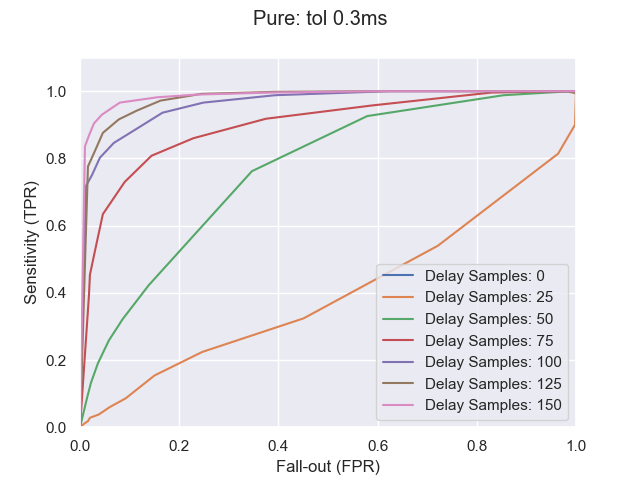

In [15]:
v3_pd_analyse = pd.read_csv("v3_roc_data.csv.temp")
plot_roc_curve(v3_pd_analyse, title="Pure: tol 0.3ms")
print()


In [16]:
# u4_roc_data = sigdat_combo.get_roc_curve_data(inv_frac_vals = inv_frac_vals,
#                                         delay_samples_vals = delay_samples_vals,
#                                         tolerance = 2e-3,
#                                         verbose = True,
#                                        )

# u4_pd = pd.DataFrame(u4_roc_data)  # Faster to pass list of dicts than to add rows iteratively
# u4_pd.to_csv("u4_roc_data.csv.temp")


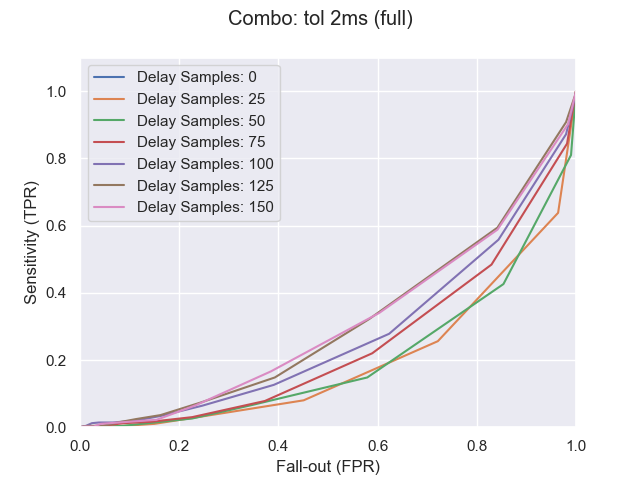

In [17]:
u4_pd_analyse = pd.read_csv("u4_roc_data.csv.temp")
plot_roc_curve(u4_pd_analyse, title="Combo: tol 2ms (full)")
print()


In [18]:
# v4_roc_data = sigdat_pure.get_roc_curve_data(inv_frac_vals = inv_frac_vals,
#                                         delay_samples_vals = delay_samples_vals,
#                                         tolerance = 2e-3,
#                                         verbose = True,
#                                        )

# v4_pd = pd.DataFrame(v4_roc_data)  # Faster to pass list of dicts than to add rows iteratively
# v4_pd.to_csv("v4_roc_data.csv.temp")


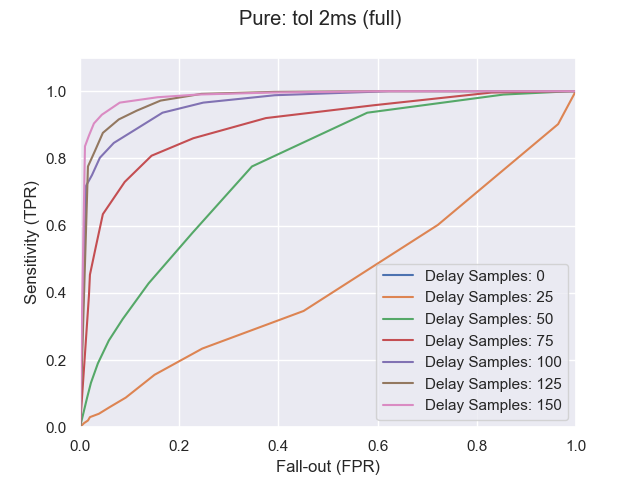

In [19]:
v4_pd_analyse = pd.read_csv("v4_roc_data.csv.temp")
plot_roc_curve(v4_pd_analyse, title="Pure: tol 2ms (full)")
print()


In [22]:
decay_part_vals = np.arange(900, 1020 + 5, 5)

roc_datas = []

for decay_part in decay_part_vals:
    sigdat_combo.filter_alg_args["DECAY_PART"] = decay_part
    roc_data = sigdat_pure.get_roc_curve_data(inv_frac_vals = inv_frac_vals,
                                            delay_samples_vals = delay_samples_vals,
                                            tolerance = 1,
                                            verbose = True,
                                           )
    for performance in roc_data:
        performance["decay_part"] = decay_part
    
    roc_datas.append(roc_data)

# pd = pd.DataFrame(roc_datas)  # Faster to pass list of dicts than to add rows iteratively
# pd.to_csv("vary_filter_roc_data.csv.temp")
roc_datas_flat = [ item for row in roc_datas for item in row ]
pd_flat = pd.DataFrame(roc_datas_flat)

pd_flat.to_csv("vary_filter_roc_data.csv.temp")


Tolerance [s]: 1
.......
.......
Wall time: 3 mins, 6 secs
CPU time: 2 mins, 13 secs
Tolerance [s]: 1
.......
.......
Wall time: 2 mins, 47 secs
CPU time: 2 mins, 4 secs
Tolerance [s]: 1
.......
.......
Wall time: 3 mins, 15 secs
CPU time: 1 min, 55 secs
Tolerance [s]: 1
.......
.......
Wall time: 3 mins, 7 secs
CPU time: 1 min, 59 secs
Tolerance [s]: 1
.......
.......
Wall time: 3 mins, 15 secs
CPU time: 1 min, 59 secs
Tolerance [s]: 1
.......
.......
Wall time: 2 mins, 57 secs
CPU time: 2 mins, 1 sec
Tolerance [s]: 1
.......
.......
Wall time: 3 mins, 3 secs
CPU time: 2 mins, 4 secs
Tolerance [s]: 1
.......
.......
Wall time: 3 mins, 8 secs
CPU time: 1 min, 56 secs
Tolerance [s]: 1
.......
.......
Wall time: 2 mins, 57 secs
CPU time: 2 mins, 2 secs
Tolerance [s]: 1
.......
.......
Wall time: 2 mins, 48 secs
CPU time: 1 min, 52 secs
Tolerance [s]: 1
.......
.......
Wall time: 2 mins, 42 secs
CPU time: 1 min, 52 secs
Tolerance [s]: 1
.......
.......
Wall time: 2 mins, 45 secs
CPU time:

interactive(children=(IntSlider(value=950, description='Decay part / 1024', layout=Layout(width='50%'), max=10…

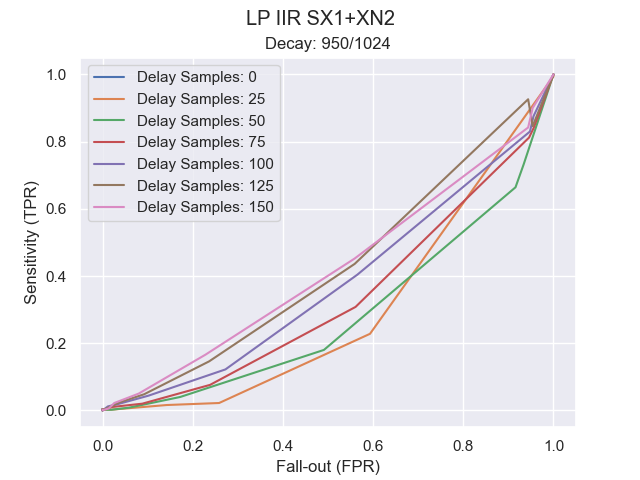

In [26]:
pd_analyse = pd.read_csv("vary_filter_roc_data - LP IIR SX1+XN2 Tol 1s.csv.temp")
# pd_analyse.head()
plot_roc_curves(pd_analyse, title="LP IIR SX1+XN2")
print()


interactive(children=(IntSlider(value=950, description='Decay part / 1024', layout=Layout(width='50%'), max=10…

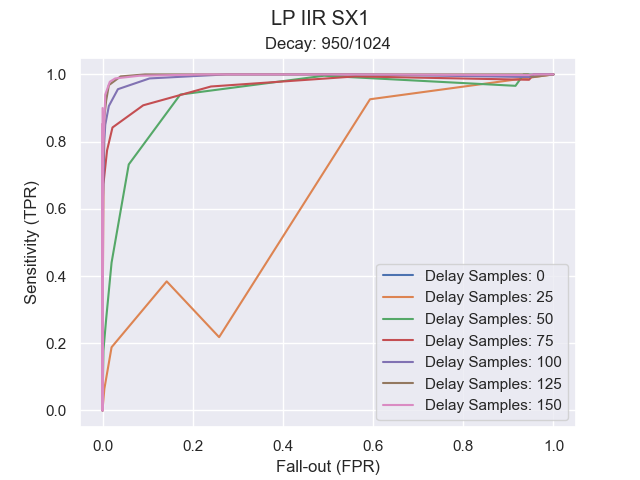

In [25]:
pd_analyse = pd.read_csv("vary_filter_roc_data - LP IIR SX1 Tol 1s.csv.temp")
# pd_analyse.head()
plot_roc_curves(pd_analyse, title="LP IIR SX1")
print()
